In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('economic_data.csv')

In [7]:
df.shape

(24, 5)

In [9]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [11]:
# drop unnecessary col
df.drop(columns=['year','month'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

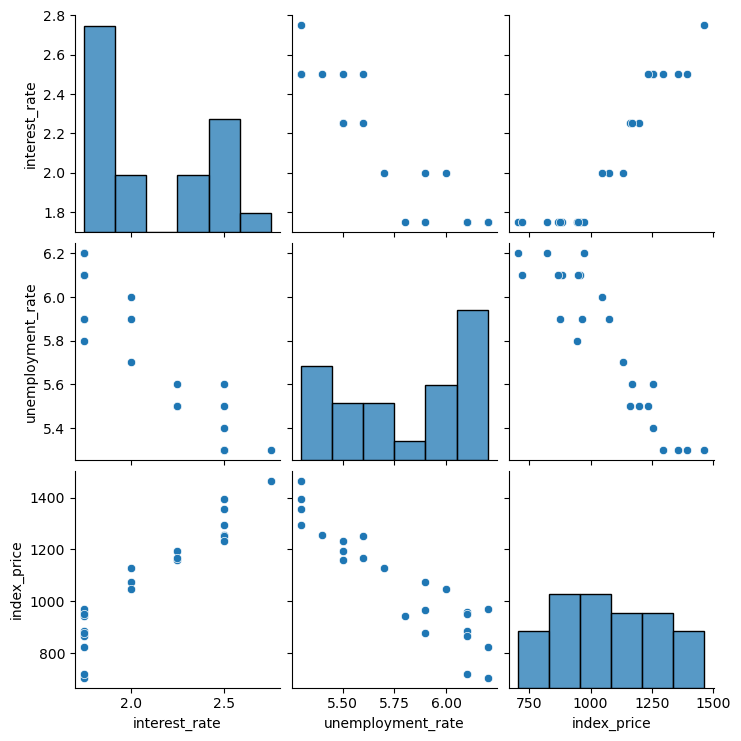

In [15]:
# visualisation
import seaborn as sns
sns.pairplot(df)

In [16]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemp rate')

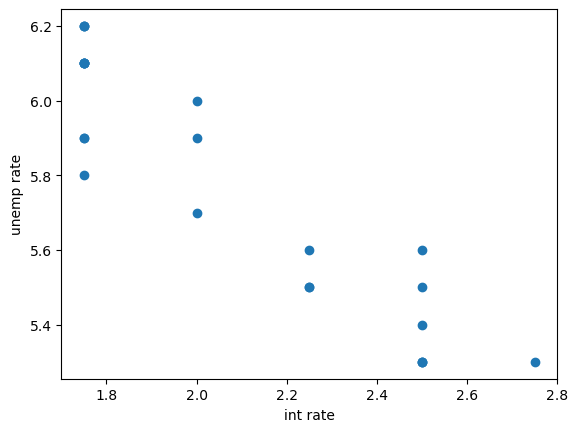

In [19]:
# visualise closely
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('int rate')
plt.ylabel('unemp rate')

In [28]:
# indep and dep features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [29]:
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [30]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [33]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

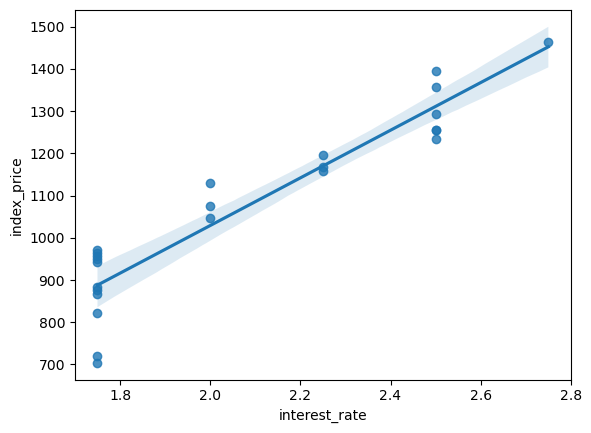

In [41]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

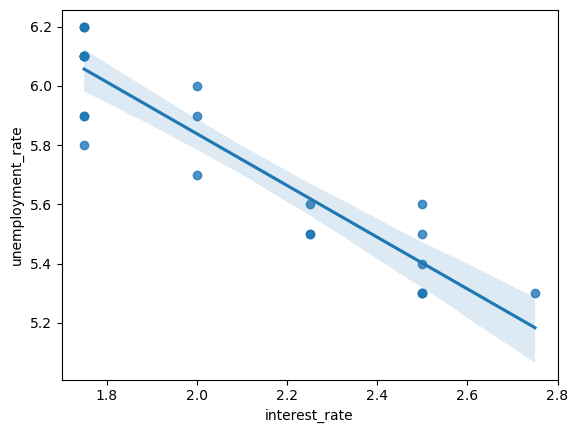

In [43]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

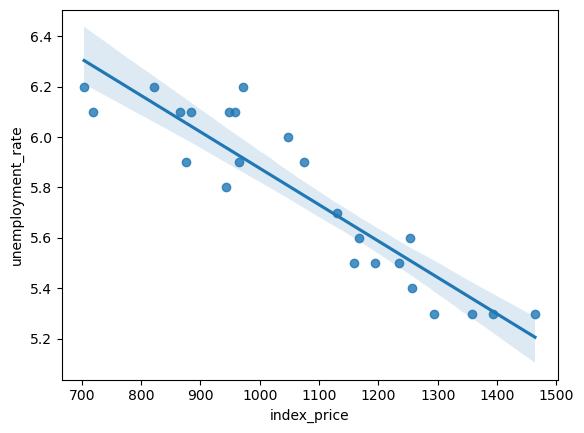

In [44]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'])


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [49]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [50]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [51]:
regression.fit(X_train,Y_train)

LinearRegression()

In [55]:
# cross validation
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [56]:
np.mean(val_score)

-5914.828180162388

In [58]:
# prediction
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [61]:
# performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [62]:
# r sq
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.7591371539010257


In [63]:
# assumption


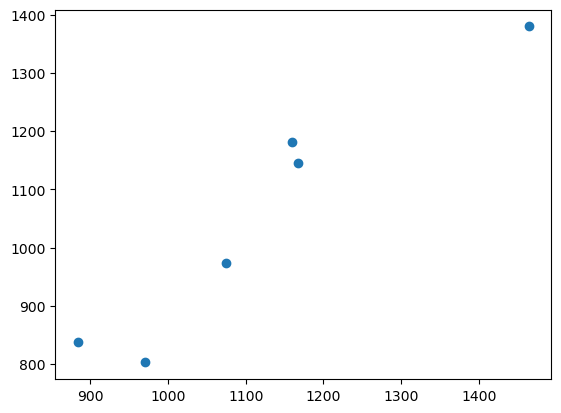

In [64]:
plt.scatter(Y_test,y_pred)

In [65]:
residuals=Y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

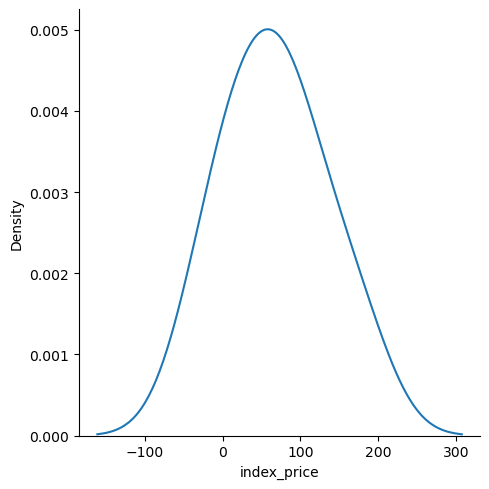

In [66]:
sns.displot(residuals,kind='kde')

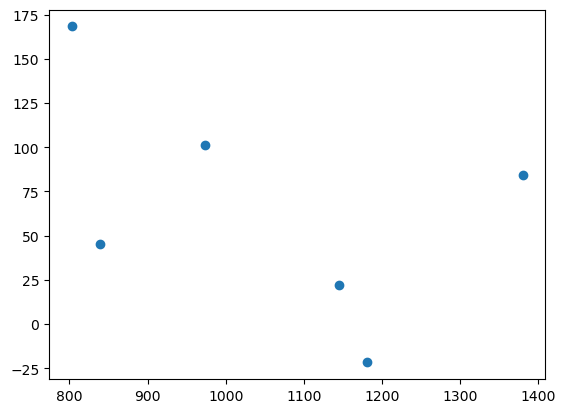

In [67]:
# scatter wrt pred and residuals
plt.scatter(y_pred,residuals)

In [68]:
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [70]:
model.summary()

d:\anaconda python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 12 May 2025   Prob (F-statistic):                       0.754
Time:                        15:06:19   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
print(regression.coef_)

[  88.27275507 -116.25716066]
